Importing the necessary libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

Data Collection and Analysis

In [2]:
gold_data = pd.read_csv('gold_price_data.csv')

Displaying the first 5 rows of dataframe

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Displaying the last 5 rows of dataframe

In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


No. of rows and columns

In [5]:
shape = gold_data.shape
print("Rows",shape[0])
print("Columns",shape[1])

Rows 2290
Columns 6


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [9]:
gold_data['Day'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

In [10]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [11]:
gold_data.drop(labels=['Date'],axis=1,inplace=True)

In [12]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [13]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
2285,2671.919922,124.589996,14.0600,15.5100,1.186789,8,5,2018
2286,2697.790039,124.330002,14.3700,15.5300,1.184722,9,5,2018
2287,2723.070068,125.180000,14.4100,15.7400,1.191753,10,5,2018
2288,2730.129883,124.489998,14.3800,15.5600,1.193118,14,5,2018
2289,2725.780029,122.543800,14.4058,15.4542,1.182033,16,5,2018


Check for missing values

In [14]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
Day        0
Month      0
Year       0
dtype: int64

Check for duplicate values

In [15]:
gold_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [16]:
gold_data.duplicated().sum()

0

Statistical measures of data

In [17]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,15.644541,6.329258,2012.724891
std,519.111540,23.283346,19.523517,7.092566,0.131547,8.746132,3.591149,2.993271
min,676.530029,70.000000,7.960000,8.850000,1.039047,1.000000,1.000000,2008.000000
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,8.000000,3.000000,2010.000000
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,15.500000,6.000000,2013.000000
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,23.000000,10.000000,2015.000000
max,2872.870117,184.589996,117.480003,47.259998,1.598798,31.000000,12.000000,2018.000000


Check for correlation <br>
1. Positive Correlation -> if 2 variables are directly proportional <br>
2. Negative Correlation -> if 2 variables are inversly proportional <br>

In [18]:
correlation = gold_data.corr()

Constructing a heatmap for understanding correlation

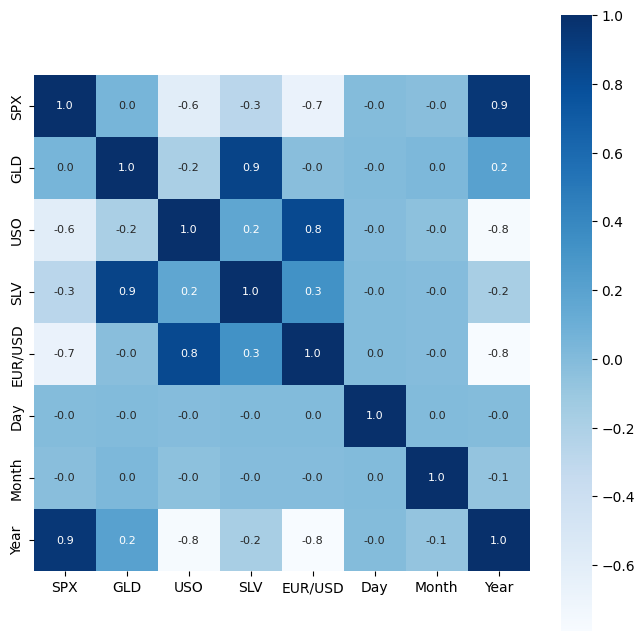

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [20]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Day       -0.000198
Month      0.020494
Year       0.206654
Name: GLD, dtype: float64

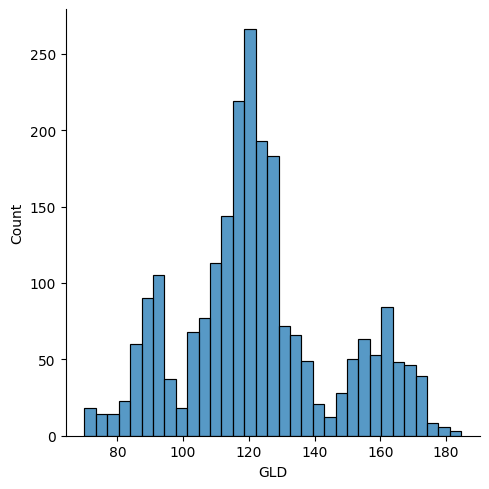

In [21]:
sns.displot(gold_data['GLD'])
plt.show()

Splitting the dataframe into independent and dependent features

In [22]:
X = gold_data.drop(labels=['GLD'],axis=1)
y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD  Day  Month  Year
0     1447.160034  78.470001  15.1800  1.471692    2      1  2008
1     1447.160034  78.370003  15.2850  1.474491    3      1  2008
2     1411.630005  77.309998  15.1670  1.475492    4      1  2008
3     1416.180054  75.500000  15.0530  1.468299    7      1  2008
4     1390.189941  76.059998  15.5900  1.557099    8      1  2008
...           ...        ...      ...       ...  ...    ...   ...
2285  2671.919922  14.060000  15.5100  1.186789    8      5  2018
2286  2697.790039  14.370000  15.5300  1.184722    9      5  2018
2287  2723.070068  14.410000  15.7400  1.191753   10      5  2018
2288  2730.129883  14.380000  15.5600  1.193118   14      5  2018
2289  2725.780029  14.405800  15.4542  1.182033   16      5  2018

[2290 rows x 7 columns]


In [24]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into train and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Model Training

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

Model Evaluation ->Prediction on test data

In [28]:
test_data_pred = regressor.predict(X_test)

In [29]:
print(test_data_pred)

[168.12319861  83.45989975 116.16550065 127.642401   120.16740078
 154.57959826 150.49939935 126.31580002 117.759099   126.08060079
 115.57280124 170.86170078 141.49929978 167.85419812 115.20920065
 117.36080062 134.4451009  171.2555025  159.84410352 172.44989994
 155.13320062 124.48800034 175.57850005 157.00770295 125.21680053
  93.62789898  77.02670013 119.20120027 118.97919892 167.35789855
  88.10680065 125.4247003   91.90680032 117.68329984 121.10680007
 135.61430156 115.82580053 114.53190095 142.02929945 107.40270074
 105.84140242  87.01399754 126.43380092 117.68040036 154.30019928
 120.06739946 108.3386998  108.1112973   92.852      127.25619697
  75.68699986 114.17250042 121.08280013 111.34229954 118.78679872
 121.04939902 160.24450128 174.40640005 146.32059691  87.22459973
  93.39520016  86.76839868  89.66600039 119.13990095 126.42070046
 127.7928996  172.0920012  122.1513999  117.7065984   97.56519994
 168.21490228 142.33399865 133.09690301 120.57090064 123.54279889
 119.53450

Compare Y_test and test_data_pred

In [30]:
score = r2_score(y_test,test_data_pred)
print(score)

0.9951537829986654


In [31]:
mse = mean_squared_error(y_test,test_data_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test,test_data_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.556105660110906
Mean Absolute Error: 1.009208545436679


Compare the actual values and predicted values in plot

In [32]:
y_test = list(y_test)

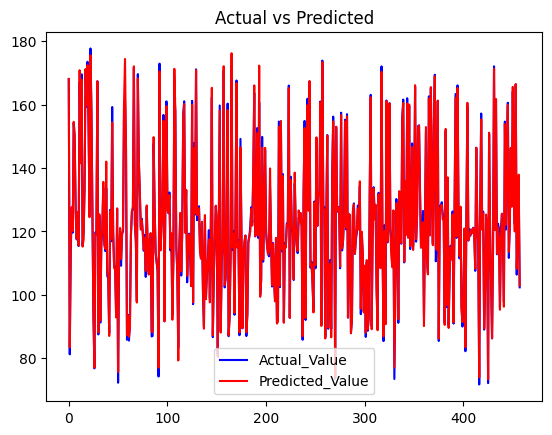

In [33]:
plt.plot(y_test,color='blue',label='Actual_Value')
plt.plot(test_data_pred,color='red',label='Predicted_Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

Creating the predictive system

In [34]:

input_data = [1252.540039,101.459999,17.26,1.5673,2008,7,24] # y = 91.330002

# Convert the list to a numpy array for easy manipulation
input_data = np.array(input_data)  

# reshape array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("Gold price for given input is:",prediction)

Gold price for given input is: [90.95869901]
